# Week 2, part 2: Counting words and sentiment arcs

The two readings for this week try to model plot as a cycle of positivity 
and negativity. How well can we measure these constructs in novels?

In this work we'll look at evaluating documents with respect to a fixed
vocabulary. I've included two sample sentiment lexicons, one by 
Bing Liu and one from Matt Jockers' "syuzhet" package.

( For an interactive look, see this page: https://mimno.infosci.cornell.edu/sentiment/ )

In [69]:
import re, sys
from collections import Counter
from matplotlib import pyplot
import numpy, pandas
from IPython.display import display, Markdown

 1. There's a bug in the code. All the paragraphs are being scored as 0.
  Fix it, and describe what was happening. 

 [Description here]

 2. I'm using the Counter class from the `collections` package instead of a 
  python `dict`. Consult the documentation https://docs.python.org/3/library/collections.html
  and describe four features that Counter provides that dict does not.

 a.
 b.
 c.
 d.

 3. The directory `txt` contains works by Charles Dickens in the correct format:
  one paragraph per line. Apply the two lexicons to `tale.txt`. Do they work?
  Do they agree? Provide specific examples.

 [Description here]

 4. The code is currently just adding up all the scores for each word token.
  This favors longer documents: if we just repeat the contents twice, the score doubles.
  What happens if we normalize by document length? In the `score_counts` function,
  divide the score by the total number of tokens.

 [Describe how the output changes here. Is this normalization a good idea? Why or why not?]

 5. Working with your table, create a lexicon for one of the emotions listed on
  on the board, or choose your own. You may collect additional documents to test
  your lexicon, please include these if so.

 [Include your team's final lexicon in your zip file. Discuss here your personal experience. What was hard about this process?]

 6. I've set this up so that we are looking at the most extreme passages in 
  the sources. What does this approach show, and what does it hide? How does it
  affect how we evaluate the tool?

 [Discuss here]

 IDEAS FOR YOUR WRITING RESPONSE FOR FRIDAY:

 Both groups are working from Vonnegut's description of plot. Does this
  view really reflect plot? If not, what is missing, and how important is it
  to you?

 Given your experience with lexicon-based sentiment analysis, how well does
  it approximate a quantity that's relevant for plot analysis?

 Would a more nuanced view of emotion lead to a better representation of plot?

In [18]:
def load_word_weights(weights_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.rstrip().split(",") ## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [19]:
word_weights = load_word_weights("bingliu.csv")

In [20]:
word_weights["miserable"]

-1.0

In [12]:
word_weights["glory"]

1.0

In [41]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score / sum(counter.values())

In [42]:
sample_counter = Counter(["happy", "happy", "joy", "joy"])

score_counts(sample_counter, word_weights)

1.0

In [43]:
score_counts(Counter(["happy", "happy", "joy", "joy", "despair"]), word_weights)

0.6

In [44]:
def load_paragraphs(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    
    ## here's where we actually read the file
    with open(text_file, encoding="utf-8") as file:
    
        ## This block reads a file line by line.
        for line in file:
            line = line.rstrip()
        
            tokens = word_pattern.findall(line)
        
            ## turn a list into a word->count map
            paragraph_counts = Counter(tokens)
        
            ## create the paragraph object, with the original text, 
            ##  the word counts, and the total score.
            paragraphs.append({'text': line, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })

    return paragraphs

In [52]:
paragraphs = load_paragraphs("txt/christmas.txt")

In [53]:
paragraphs[8]

{'counts': Counter({'INTRODUCTION': 1}), 'score': 0.0, 'text': 'INTRODUCTION'}

In [58]:
pyplot.figure()

<Figure size 432x288 with 0 Axes>

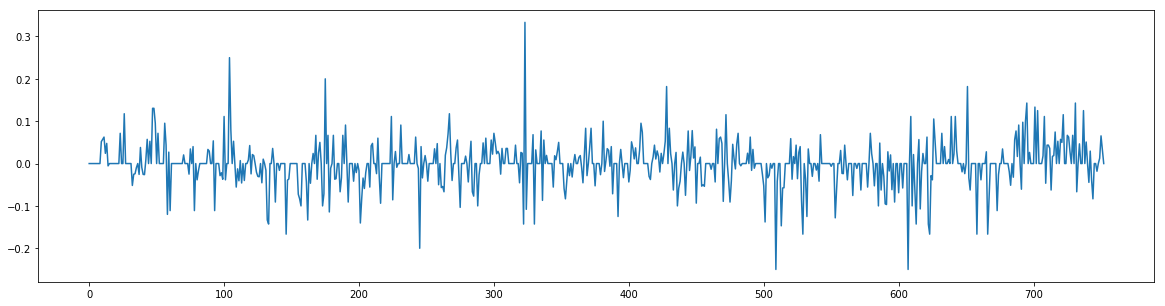

In [74]:
sentiment_scores = numpy.array([p["score"] for p in paragraphs])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

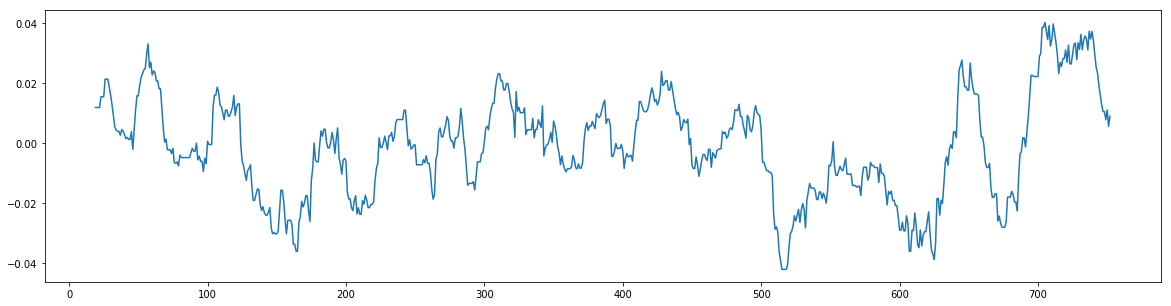

In [78]:
rolling_mean = pandas.Series(sentiment_scores).rolling(20).mean()

pyplot.figure(figsize=(20, 5))
pyplot.plot(rolling_mean)
pyplot.show()

In [81]:
for p in paragraphs[600:630]:
    print(f"{p['score']:.2f}\t{p['text']}")

-0.07	"If there is any person in the town who feels emotion caused by this man's death," said Scrooge, quite agonised, "show that person to me, Spirit! I beseech you."
0.00	The Phantom spread its dark robe before him for a moment, like a wing; and, withdrawing it, revealed a room by daylight, where a mother and her children were.
0.00	She was expecting some one, and with anxious eagerness; for she walked up and down the room; started at every sound; looked out from the window; glanced at the clock; tried, but in vain, to work with her needle; and could hardly bear the voices of her children in their play.
-0.06	At length the long-expected knock was heard. She hurried to the door, and met her husband; a man whose face was careworn and depressed, though he was young. There was a remarkable expression in it now; a kind of serious delight of which he felt ashamed, and which he struggled to repress.
0.00	He sat down to the dinner that had been hoarding for him by the fire, and, when she ask

In [56]:
sorted_paragraphs = sorted(paragraphs, key=lambda x: x["score"])

## Display the 10 most negative
for paragraph in sorted_paragraphs[0:9]:
    print("{}\t{}".format(paragraph['score'], paragraph['text']))

## ... and the 10 most positive
for paragraph in sorted_paragraphs[-10:-1]:
    print("{}\t{}".format(paragraph['score'], paragraph['text']))

-0.25	The bell struck Twelve.
-0.25	"We are quite ruined?"
-0.2	"I am a mortal," Scrooge remonstrated, "and liable to fall."
-0.16666666666666666	"Why do you doubt your senses?"
-0.16666666666666666	"When did he die?" inquired another.
-0.16666666666666666	The colour? Ah, poor Tiny Tim!
-0.16666666666666666	The inexorable finger underwent no change.
-0.16666666666666666	The Spirit was immovable as ever.
-0.14705882352941177	The Phantom slowly, gravely, silently approached. When it came near him, Scrooge bent down upon his knee; for in the very air through which this Spirit moved it seemed to scatter gloom and mystery.
0.13043478260869565	"I do," said Scrooge. "Merry Christmas! What right have you to be merry? What reason have you to be merry? You're poor enough."
0.13043478260869565	"Come, then," returned the nephew gaily. "What right have you to be dismal? What reason have you to be morose? You're rich enough."
0.13333333333333333	"An intelligent boy!" said Scrooge. "A remarkable boy!